In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### 1. Exploratory Data Analysis

#### 1.1 Import data

In [4]:
heart_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")
heart_df = heart_raw.copy()[["creatinine_phosphokinase","serum_creatinine", "serum_sodium","platelets", "DEATH_EVENT"]]
heart_df.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets,DEATH_EVENT
0,582,1.9,130,265000.00,1
1,7861,1.1,136,263358.03,1
2,146,1.3,129,162000.00,1
3,111,1.9,137,210000.00,1
4,160,2.7,116,327000.00,1


In [5]:
df_0 = heart_df[heart_df["DEATH_EVENT"]==0][["creatinine_phosphokinase","serum_creatinine", "serum_sodium","platelets"]]
df_0.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
14,80,1.0,138,427000.0
20,52,1.3,137,276000.0
23,63,0.8,135,368000.0
33,159,1.2,138,302000.0
38,2656,2.3,137,305000.0


#### 1.2 - Create visual representations of correlation

In [6]:
M0 = df_0.corr()
M0.style.background_gradient(cmap='coolwarm')

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.043110,-0.002474,-0.012940
serum_creatinine,-0.043110,1.000000,-0.215651,-0.031217
serum_sodium,-0.002474,-0.215651,1.000000,0.001807
platelets,-0.012940,-0.031217,0.001807,1.000000


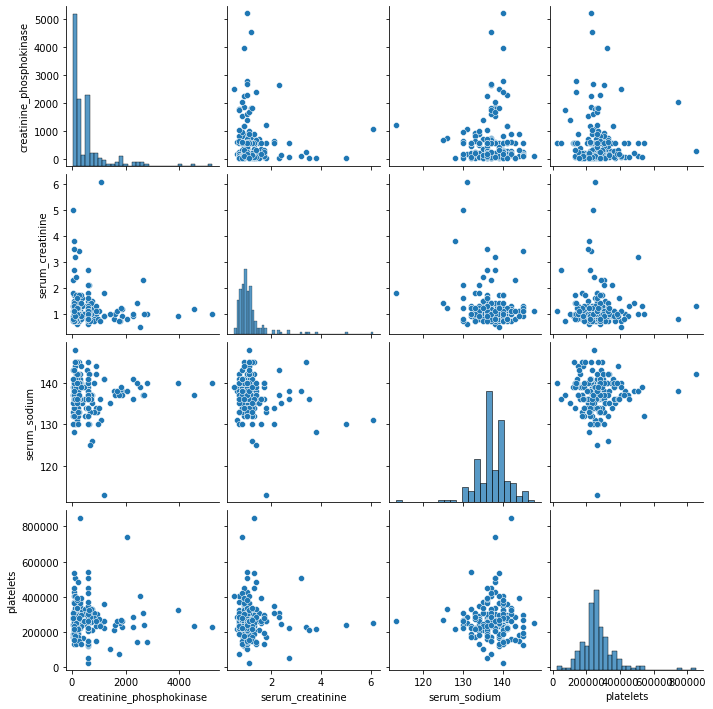

In [9]:
sns.pairplot(df_0)

In [8]:
df_1 = heart_df[heart_df["DEATH_EVENT"]==1][["creatinine_phosphokinase","serum_creatinine", "serum_sodium","platelets"]]
df_1.head()

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
0,582,1.9,130,265000.00
1,7861,1.1,136,263358.03
2,146,1.3,129,162000.00
3,111,1.9,137,210000.00
4,160,2.7,116,327000.00


In [12]:
M1 = df_1.corr()
M1.style.background_gradient(cmap='coolwarm')

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
creatinine_phosphokinase,1.000000,-0.033407,0.148823,0.078808
serum_creatinine,-0.033407,1.000000,-0.094011,-0.029384
serum_sodium,0.148823,-0.094011,1.000000,0.141284
platelets,0.078808,-0.029384,0.141284,1.000000


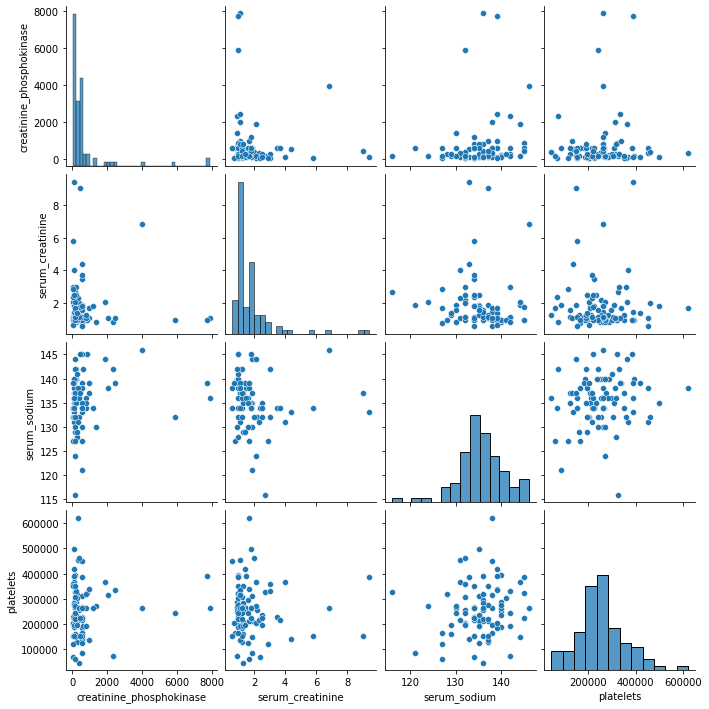

In [10]:
sns.pairplot(df_1)

#### 1.3 - Correlation observations

3a. Which features have the highest correlation for surviving patients? 
- Serum sodium and platelets.

3b. Which features have the lowest correlation for surviving patients?
- Serum sodium and serum creatinine

3c. Which features have the highest correlation for deceased patients? 
- Serum sodium and platelets.

3d. Which features have the lowest correlation for deceased patients?
- Serum creatinine and creatinine phosphokinase

3e. Are results the same for both cases?
- The results are the same for features with the highest correlation among deceased and surviving patients (serum sodium and platelets).

### 2 - Building Linear Models
(Group 2 - serum sodium and platelets)

#### 2.1 Simple Linear Regression

##### Surviving Patients

###### 2.1.a Fit the model

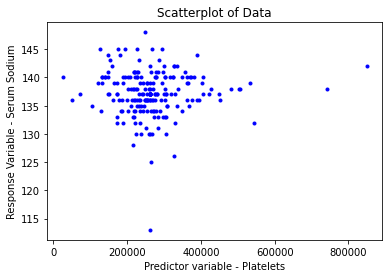

In [31]:
# visual inspection of the data
X = df_0[['platelets']].copy().to_numpy()
y = df_0[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [22]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[1.09212711e-06]]


In [35]:
# create predictions
y_pred = model.predict(x_test)

# look at the first five predictions
y_pred[:5]

array([[136.89923723],
       [136.91452701],
       [137.20940133],
       [137.03575312],
       [136.8981451 ]])

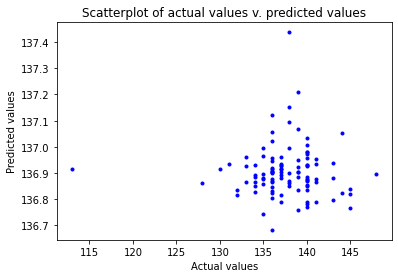

In [36]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [44]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1767.233


##### Deceased Patients

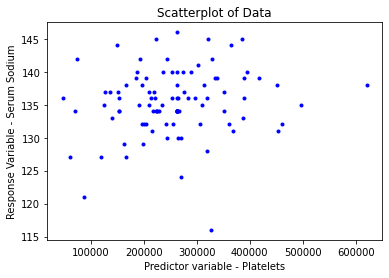

In [45]:
# visual inspection of the data
X = df_1[['platelets']].copy().to_numpy()
y = df_1[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [46]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[-4.89948451e-06]]


In [48]:
# create predictions
y_pred = model.predict(x_test)

# look at the first five predictions
y_pred[:5]

array([[135.45434161],
       [134.85170501],
       [135.44944212],
       [135.84630037],
       [135.72381325]])

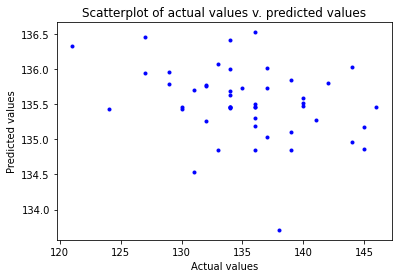

In [49]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [50]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1456.53


#### 2.2 Quadratic

##### Surviving Patients

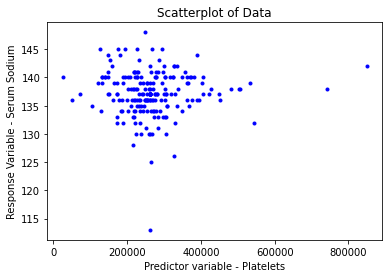

In [83]:
# visual inspection of the data
X = df_0[['platelets']].copy().to_numpy()
y = df_0[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [84]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
poly = PolynomialFeatures(2)
X_new = poly.fit_transform(x_train)
model.fit(X_new, y_train)

LinearRegression()

In [85]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[ 0.00000000e+00 -2.24074583e-05  2.87115278e-11]]


In [86]:
# create predictions
x_test_new = poly.fit_transform(x_test)
y_pred = model.predict(x_test_new)

# look at the first five predictions
y_pred[:5]

array([[136.50620406],
       [137.08577569],
       [137.02760501],
       [137.21055826],
       [137.14676011]])

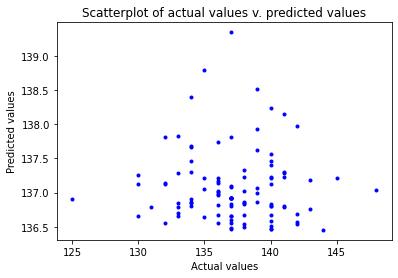

In [87]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [88]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1339.437


##### Deceased Patients

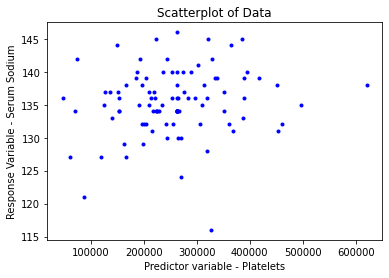

In [89]:
# visual inspection of the data
X = df_1[['platelets']].copy().to_numpy()
y = df_1[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [90]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
poly = PolynomialFeatures(2)
X_new = poly.fit_transform(x_train)
model.fit(X_new, y_train)

LinearRegression()

In [91]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[ 0.00000000e+00  1.43130364e-05 -7.30591005e-12]]


In [92]:
# create predictions
x_test_new = poly.fit_transform(x_test)
y_pred = model.predict(x_test_new)

# look at the first five predictions
y_pred[:5]

array([[135.49112276],
       [134.98278876],
       [135.84083636],
       [136.26085349],
       [137.1361252 ]])

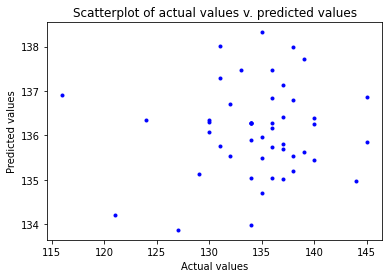

In [93]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [94]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1488.859


#### 2.3 Cubic Spline

##### Surviving Patients

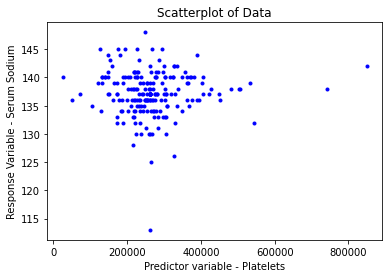

In [67]:
# visual inspection of the data
X = df_0[['platelets']].copy().to_numpy()
y = df_0[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [68]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
poly = PolynomialFeatures(3)
X_new = poly.fit_transform(x_train)
model.fit(X_new, y_train)

LinearRegression()

In [69]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[ 0.00000000e+00 -4.76005473e-05  1.26273080e-10 -9.34514510e-17]]


In [70]:
# create predictions
x_test_new = poly.fit_transform(x_test)
y_pred = model.predict(x_test_new)

# look at the first five predictions
y_pred[:5]

array([[136.99228217],
       [138.15462688],
       [137.04863588],
       [137.85737606],
       [137.40615701]])

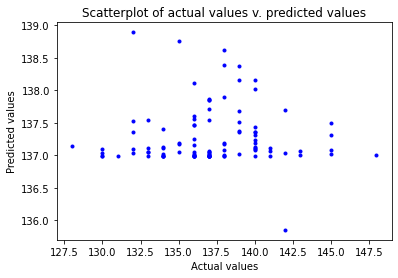

In [71]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [72]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1368.116


##### Deceased Patients

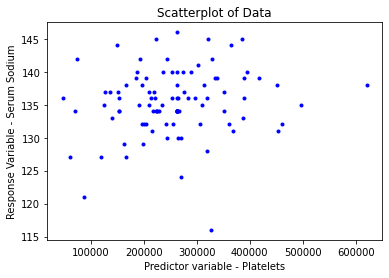

In [73]:
# visual inspection of the data
X = df_1[['platelets']].copy().to_numpy()
y = df_1[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [74]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
poly = PolynomialFeatures(3)
X_new = poly.fit_transform(x_train)
model.fit(X_new, y_train)

LinearRegression()

In [75]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[ 0.00000000e+00 -4.41707681e-05  1.75280951e-10 -1.95081852e-16]]


In [76]:
# create predictions
x_test_new = poly.fit_transform(x_test)
y_pred = model.predict(x_test_new)

# look at the first five predictions
y_pred[:5]

array([[135.90784047],
       [135.93013314],
       [135.98682227],
       [134.77523761],
       [134.76561654]])

###### 2.3.d Plot (if possible) predicted and actual values of X test

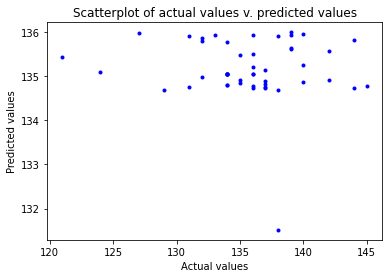

In [77]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [78]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1080.676


#### 2.4 Generalized Linear Model (Log X)

##### Surviving Patients

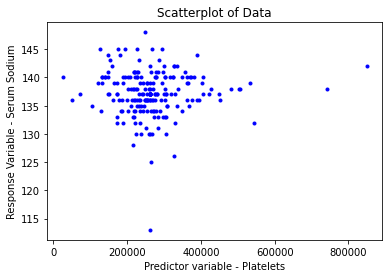

In [96]:
# visual inspection of the data
X = df_0[['platelets']].copy().to_numpy()
y = df_0[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [97]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
model.fit(np.log(x_train), y_train)

LinearRegression()

In [98]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[-0.62478179]]


In [99]:
# create predictions
y_pred = model.predict(np.log(x_test))

# look at the first five predictions
y_pred[:5]

array([[137.41512966],
       [137.43773437],
       [137.33791972],
       [138.21675906],
       [137.32341336]])

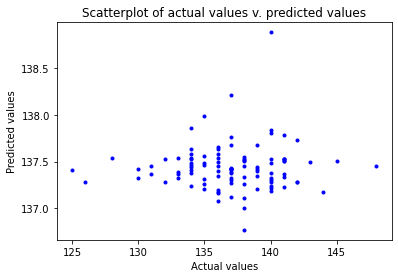

In [102]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [103]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1420.211


##### Deceased Patients

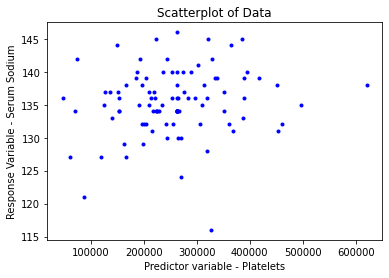

In [104]:
# visual inspection of the data
X = df_1[['platelets']].copy().to_numpy()
y = df_1[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [105]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
model.fit(np.log(x_train), y_train)

LinearRegression()

In [106]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[2.53578273]]


In [107]:
# create predictions
y_pred = model.predict(np.log(x_test))

# look at the first five predictions
y_pred[:5]

array([[136.14163227],
       [135.56420096],
       [136.95825434],
       [136.30576962],
       [135.47556263]])

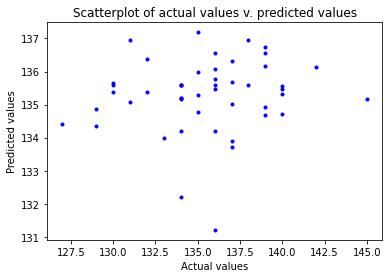

In [108]:
plt.plot(y_test, y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [109]:
SSE = sum((y_test-y_pred)**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  650.182


#### 2.4 Generalized Linear Model (Log Y)

##### Surviving Patients

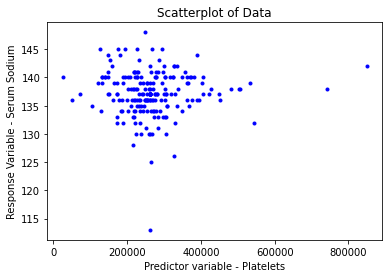

In [132]:
# visual inspection of the data
X = df_0[['platelets']].copy().to_numpy()
y = df_0[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [133]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
model.fit(np.log(x_train), np.log(y_train))

LinearRegression()

In [134]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[0.00600607]]


In [135]:
# create predictions
y_pred = model.predict(np.log(x_test))

# look at the first five predictions
y_pred[:5]

array([[4.91340115],
       [4.91602041],
       [4.91567406],
       [4.91494605],
       [4.91359809]])

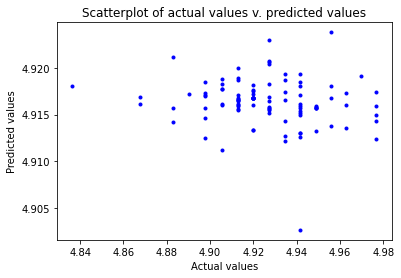

In [136]:
plt.plot(np.log(y_test), y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [137]:
SSE = sum((np.log(y_test)-np.log(y_pred))**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1133.233


##### Deceased Patients

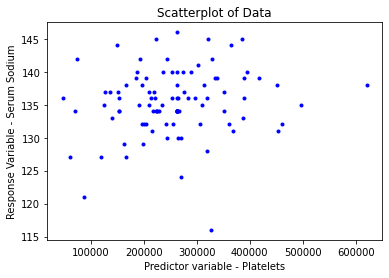

In [ ]:
# visual inspection of the data
X = df_1[['platelets']].copy().to_numpy()
y = df_1[['serum_sodium']].copy().to_numpy()

plt.plot(X, y, "b.")
plt.xlabel("Predictor variable - Platelets")
plt.ylabel("Response Variable - Serum Sodium")
plt.title("Scatterplot of Data")
plt.show()

In [115]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# fit the model
model = LinearRegression()
model.fit(np.log(x_train), np.log(y_train))

LinearRegression()

In [116]:
# extract the model weights
coefs = model.coef_

# print the weights
print("weights:",coefs)

weights: [[-0.00310494]]


In [126]:
# create predictions
y_pred = model.predict(np.log(x_test))

# look at the first five predictions
y_pred[:5]

array([[4.92240588],
       [4.923399  ],
       [4.92390362],
       [4.92305995],
       [4.92295468]])

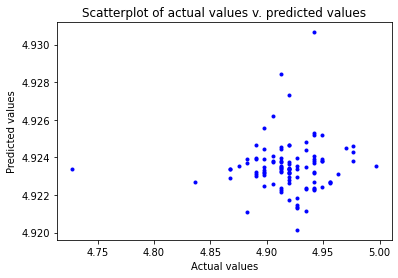

In [127]:
plt.plot(np.log(y_test), y_pred, "b.")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot of actual values v. predicted values")
plt.show()

In [128]:
SSE = sum((np.log(y_test)-np.log(y_pred))**2)
print("Loss Function Estimation: ", round(SSE[0],3)) 

Loss Function Estimation:  1127.599


### 3 Model Comparison

#### 3.0 Summary Table

In [138]:
data = {'Model':['simple linear regression', 'quadratic','cubic spline','GLM-LogX','GLM-LogY'],
'SSE_DEATH_EVENT=0': [1767.233, 1339.437, 1368.116, 1420.211, 1133.233],
'SSE_DEATH_EVENT=1': [1456.53, 1488.59, 1080.676, 650.182, 1127.599]
}

summary_df = pd.DataFrame(data)
summary_df


,Model,SSE_DEATH_EVENT=0,SSE_DEATH_EVENT=1
0,simple linear regression,1767.233,1456.530
1,quadratic,1339.437,1488.590
2,cubic spline,1368.116,1080.676
3,GLM-LogX,1420.211,650.182
4,GLM-LogY,1133.233,1127.599


#### 3.1
1. Which was the best (smallest SSE) for surviving patients? Deceased patients?
- Cubic spline was the best at predicting survival. GLM-LogX was the best at predicting death.

#### 3.2
1. Which was the worst (highest SSE) for surviving patients? Deceased patients?
- Simple linear regression was the worst at predicting survival. Quadratic polynomial regression was the worst at predicting death.